# Main Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Building Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

# Advanced Model
from flaml import AutoML
from autogluon.tabular import TabularPredictor, TabularDataset

# Building UnSupervised ML
from sklearn.decomposition import PCA

# Reading Data

In [2]:
data = pd.read_csv(r'D:\Courses language programming\9_Big Projects\23 - Classification with an Academic Success Dataset\train.csv')
test = pd.read_csv(r'D:\Courses language programming\9_Big Projects\23 - Classification with an Academic Success Dataset\test.csv')
data.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [3]:
test.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              51012 non-null  int64  
 1   Marital status                                  51012 non-null  int64  
 2   Application mode                                51012 non-null  int64  
 3   Application order                               51012 non-null  int64  
 4   Course                                          51012 non-null  int64  
 5   Daytime/evening attendance                      51012 non-null  int64  
 6   Previous qualification                          51012 non-null  int64  
 7   Previous qualification (grade)                  51012 non-null  float64
 8   Nacionality                                     51012 non-null  int64  
 9   Mother's qualification                 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

#### Data Doesn't Have Null Value

In [6]:
for i in data.columns:
    print(data[i].value_counts())

0        1
51017    1
51015    1
51014    1
51013    1
        ..
25506    1
25505    1
25504    1
25503    1
76517    1
Name: id, Length: 76518, dtype: int64
1    70189
2     5296
4      866
5      116
6       35
3       16
Name: Marital status, dtype: int64
1     35227
17    16523
39    14519
44     3012
43     2671
7      1498
18     1256
42      551
51      442
16      265
53      225
15      183
5        87
10       43
2         8
27        2
12        1
26        1
4         1
35        1
9         1
3         1
Name: Application mode, dtype: int64
1    54381
2     8875
3     5364
4     3822
5     2125
6     1947
0        3
9        1
Name: Application order, dtype: int64
9500    12074
9773     8214
9238     7935
9147     7741
9254     5425
9085     5373
9670     4760
9991     4057
9003     3733
9070     3281
9853     3198
9119     3004
171      2859
8014     2438
9130     1606
9556      746
33         72
979         1
39          1
Name: Course, dtype: int64
1    70038
0     648

In [7]:
data.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [8]:
def drop_col(df):
    col = ['id', 'Nacionality', "Mother's occupation", "Father's occupation","Displaced", "International", 'Curricular units 1st sem (credited)','Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (without evaluations)']

#     df = df.drop(columns=['id'], axis=1)
    df = df.drop(columns=col, axis=1)
    return df


data = drop_col(data)
test = drop_col(test)

In [9]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,19,122.6,...,6,14.500000,6,7,6,12.428571,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,19,19,119.8,...,4,11.600000,6,9,0,0.000000,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,3,19,144.7,...,0,0.000000,6,0,0,0.000000,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,19,3,126.1,...,7,12.591250,8,11,7,12.820000,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,19,37,120.1,...,6,12.933333,7,12,6,12.933333,7.6,2.6,0.32,Graduate


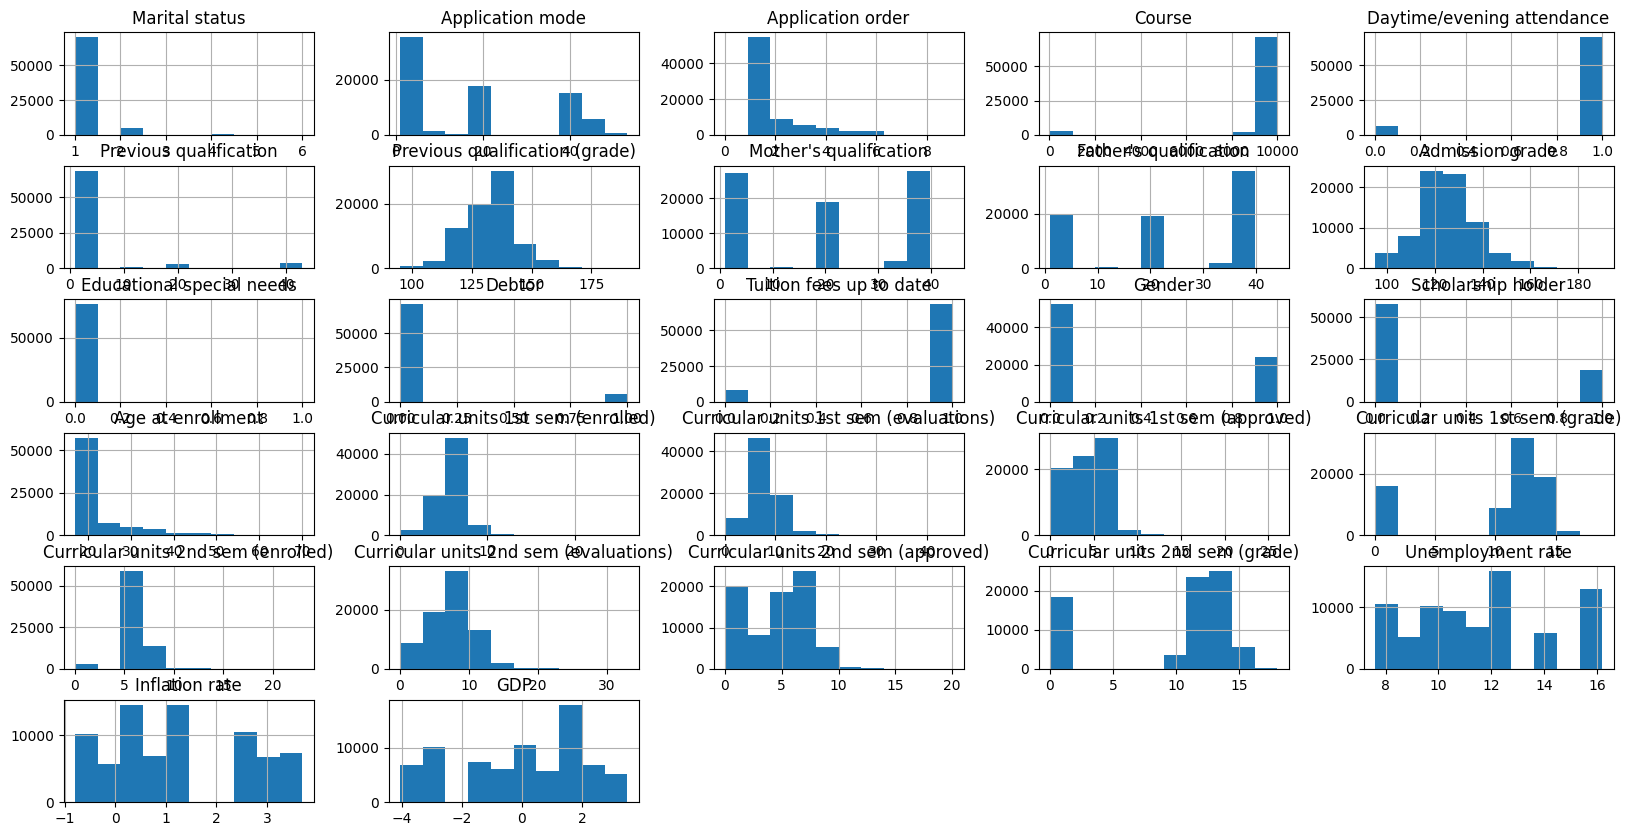

In [10]:
data.hist(figsize=(20, 10));

In [11]:
# columns I need to Deleted --> ['id', 'Nacionality', "Mother's occupation", "Father's occupation",
#                                "Displaced", "International", 'Curricular units 1st sem (credited)',
#                                'Curricular units 1st sem (without evaluations)',
#                                'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (without evaluations)']

In [12]:
def make_LE(df):
    LE = LabelEncoder()
    df['Target'] = LE.fit_transform(df['Target'])
    print(LE.classes_)
    return df

data = make_LE(data)
data.head()

['Dropout' 'Enrolled' 'Graduate']


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,19,122.6,...,6,14.500000,6,7,6,12.428571,11.1,0.6,2.02,2
1,1,17,1,9238,1,1,125.0,19,19,119.8,...,4,11.600000,6,9,0,0.000000,11.1,0.6,2.02,0
2,1,17,2,9254,1,1,137.0,3,19,144.7,...,0,0.000000,6,0,0,0.000000,16.2,0.3,-0.92,0
3,1,1,3,9500,1,1,131.0,19,3,126.1,...,7,12.591250,8,11,7,12.820000,11.1,0.6,2.02,1
4,1,1,2,9500,1,1,132.0,19,37,120.1,...,6,12.933333,7,12,6,12.933333,7.6,2.6,0.32,2


# Apply Over Sampling

In [13]:
def Over_sampling(X, Y):
    x_res, y_res = SMOTE().fit_resample(X, Y)
    new_data = pd.concat([x_res, y_res], axis=1)
    return new_data

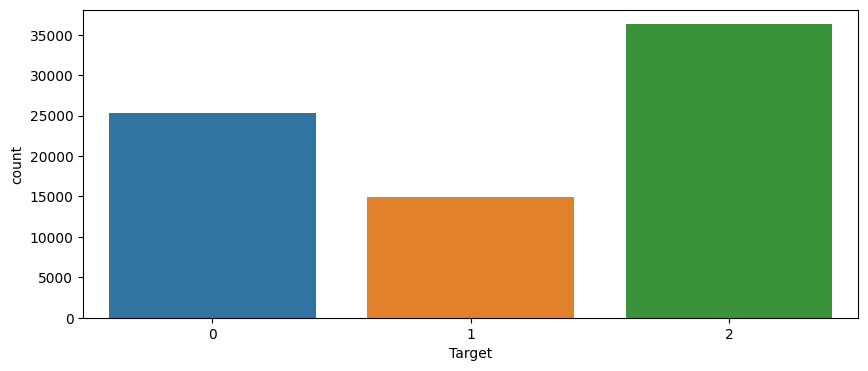

In [14]:
# Diabetic destribution
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x="Target")
plt.show()

In [15]:
X, Y = data.drop(columns='Target', axis=1), data['Target']

data = Over_sampling(X, Y)
data['Target'].value_counts()

2    36282
0    36282
1    36282
Name: Target, dtype: int64

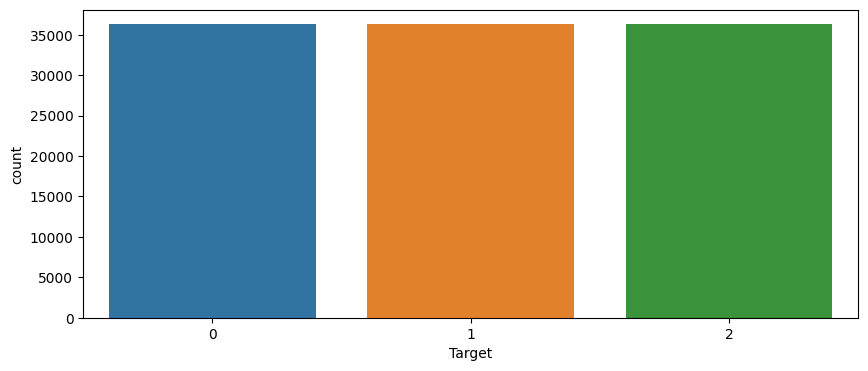

In [16]:
# Diabetic destribution
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x="Target")
plt.show()

# Apply Minmax In Data

In [ ]:
def MinMaxSc(X):
    minmax = MinMaxScaler()
    new_x = minmax.fit_transform(X)
    return new_x

In [ ]:
X, Y = data.drop(columns='Target', axis=1), data['Target']
X = MinMaxSc(X)

In [ ]:
X

In [ ]:
Y

# Splitting Data Into Training & Testing

In [17]:
X, Y = data.drop(columns='Target', axis=1), data['Target']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

# Evalution Function

In [19]:
def compute_acc(x_test, y_test, model):
    pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    mse = mean_squared_error(y_test, pred)
    mae = mean_absolute_error(y_test, pred)

    print("The Accuracy Of Model is --> ", acc)
    print("-------------------------------------------")
    print("-------------------------------------------")
    print("The Prececion Of Model is --> ", precision)
    print("-------------------------------------------")
    print("The recall Of Model is --> ", recall)
    print("-------------------------------------------")
    print("The Mean Squared Error in Model is --> ", mse)
    print("-------------------------------------------")
    print("The Mean Absolute Error in Model is --> ", mae)
    
    print("-------------------------------------------")
    print("-------------------------------------------")
    
    print(classification_report(y_test, pred))

# Building Models

## 1 - RandomForestClassifier

In [23]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

print("The Score of Training Data is --> ", model_rf.score(x_train, y_train))
print("The Score of Training Data is --> ", model_rf.score(x_test, y_test))

The Score of Training Data is -->  0.9999737505249895
The Score of Training Data is -->  0.8549335456605622


In [24]:
compute_acc(x_test, y_test, model_rf)

The Accuracy Of Model is -->  0.8549335456605622
-------------------------------------------
-------------------------------------------
The Prececion Of Model is -->  0.8584200002060411
-------------------------------------------
The recall Of Model is -->  0.8549335456605622
-------------------------------------------
The Mean Squared Error in Model is -->  0.20303791266001103
-------------------------------------------
The Mean Absolute Error in Model is -->  0.16439027377962884
-------------------------------------------
-------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     10881
           1       0.79      0.84      0.82     10779
           2       0.86      0.90      0.88     10994

    accuracy                           0.85     32654
   macro avg       0.86      0.85      0.86     32654
weighted avg       0.86      0.85      0.86     32654



## 2 - AdaBoostClassifier

In [25]:
Adaboost_clas = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=100, 
                                                                        min_samples_split=8,
                                                                        min_samples_leaf=4, 
                                                                        random_state=42),
                              n_estimators=5,
                              learning_rate=1)


Adaboost_clas.fit(x_train, y_train)

print(f"The predict Score Train is ==> {Adaboost_clas.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {Adaboost_clas.score(x_test, y_test)}")

The predict Score Train is ==> 1.0
%----------------------------------------------------------%
The predict Score Test is ==> 0.8144178354872298


In [26]:
compute_acc(x_test, y_test, Adaboost_clas)

The Accuracy Of Model is -->  0.8144178354872298
-------------------------------------------
-------------------------------------------
The Prececion Of Model is -->  0.8166634495325424
-------------------------------------------
The recall Of Model is -->  0.8144178354872298
-------------------------------------------
The Mean Squared Error in Model is -->  0.2627549457953084
-------------------------------------------
The Mean Absolute Error in Model is -->  0.21130642494028296
-------------------------------------------
-------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.81      0.84     10881
           1       0.75      0.78      0.76     10779
           2       0.83      0.85      0.84     10994

    accuracy                           0.81     32654
   macro avg       0.82      0.81      0.81     32654
weighted avg       0.82      0.81      0.82     32654



## 3 - GradientBoostingClassifier

In [27]:
GradientBoosting = GradientBoostingClassifier(loss='log_loss',
    n_estimators=100)

GradientBoosting.fit(x_train, y_train)

print(f"The predict Score Train is ==> {GradientBoosting.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {GradientBoosting.score(x_test, y_test)}")

The predict Score Train is ==> 0.8371745065098698
%----------------------------------------------------------%
The predict Score Test is ==> 0.8392846205671587


In [28]:
compute_acc(x_test, y_test, GradientBoosting)

The Accuracy Of Model is -->  0.8392846205671587
-------------------------------------------
-------------------------------------------
The Prececion Of Model is -->  0.8418435307698475
-------------------------------------------
The recall Of Model is -->  0.8392846205671587
-------------------------------------------
The Mean Squared Error in Model is -->  0.21969743369878117
-------------------------------------------
The Mean Absolute Error in Model is -->  0.18037606418815458
-------------------------------------------
-------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     10881
           1       0.78      0.80      0.79     10779
           2       0.85      0.89      0.87     10994

    accuracy                           0.84     32654
   macro avg       0.84      0.84      0.84     32654
weighted avg       0.84      0.84      0.84     32654



## 4 - XGBClassifier

In [29]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_xgb.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_xgb.score(x_test, y_test)}")

The predict Score Train is ==> 0.8953827173456531
%----------------------------------------------------------%
The predict Score Test is ==> 0.8550866662583451


In [30]:
compute_acc(x_test, y_test, model_xgb)

The Accuracy Of Model is -->  0.8550866662583451
-------------------------------------------
-------------------------------------------
The Prececion Of Model is -->  0.8569436215939045
-------------------------------------------
The recall Of Model is -->  0.8550866662583451
-------------------------------------------
The Mean Squared Error in Model is -->  0.20499785631163103
-------------------------------------------
The Mean Absolute Error in Model is -->  0.16494150793164697
-------------------------------------------
-------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.83      0.87     10881
           1       0.80      0.82      0.81     10779
           2       0.86      0.91      0.88     10994

    accuracy                           0.86     32654
   macro avg       0.86      0.85      0.85     32654
weighted avg       0.86      0.86      0.86     32654



## 5 - Voting

In [31]:
model_voting = VotingClassifier(estimators=[
    ('rf', model_rf), 
    ('GradientBoosting', GradientBoosting),
    ('XGboost', model_xgb),
    ('AdaBoost', Adaboost_clas)
], 
                                voting='soft', n_jobs=-1)


model_voting.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_voting.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_voting.score(x_test, y_test)}")

The predict Score Train is ==> 0.9797747795044099
%----------------------------------------------------------%
The predict Score Test is ==> 0.8508299136399828


In [32]:
compute_acc(x_test, y_test, model_voting)

The Accuracy Of Model is -->  0.8508299136399828
-------------------------------------------
-------------------------------------------
The Prececion Of Model is -->  0.8536866244608877
-------------------------------------------
The recall Of Model is -->  0.8508299136399828
-------------------------------------------
The Mean Squared Error in Model is -->  0.20943835364733263
-------------------------------------------
The Mean Absolute Error in Model is -->  0.16925950878912233
-------------------------------------------
-------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.83      0.87     10881
           1       0.79      0.83      0.81     10779
           2       0.86      0.90      0.88     10994

    accuracy                           0.85     32654
   macro avg       0.85      0.85      0.85     32654
weighted avg       0.85      0.85      0.85     32654



## 6 - AutoML

In [21]:
automl = AutoML()
automl.fit(x_train, y_train, task="classification", time_budget=100, n_jobs=-1, metric="accuracy")

print(f"The Accuracy SCore Train is {automl.score(x_train, y_train)}")
print(f"The Accuracy SCore Test is {automl.score(x_test, y_test)}")

[flaml.automl.logger: 06-22 01:50:11] {1679} INFO - task = classification
[flaml.automl.logger: 06-22 01:50:11] {1690} INFO - Evaluation method: holdout
[flaml.automl.logger: 06-22 01:50:11] {1788} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 06-22 01:50:11] {1900} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 06-22 01:50:11] {2218} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 06-22 01:50:11] {2344} INFO - Estimated sufficient time budget=2407s. Estimated necessary time budget=59s.
[flaml.automl.logger: 06-22 01:50:11] {2391} INFO -  at 0.5s,	estimator lgbm's best error=0.2032,	best estimator lgbm's best error=0.2032
[flaml.automl.logger: 06-22 01:50:11] {2218} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 06-22 01:50:11] {2391} INFO -  at 0.5s,	estimator lgbm's best error=0.2032,	best estimator lgbm's best error=0.2032
[flaml.automl.log

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:11] {2218} INFO - iteration 10, current learner xgboost
[flaml.automl.logger: 06-22 01:50:11] {2391} INFO -  at 0.9s,	estimator xgboost's best error=0.2040,	best estimator lgbm's best error=0.1771
[flaml.automl.logger: 06-22 01:50:11] {2218} INFO - iteration 11, current learner xgboost
[flaml.automl.logger: 06-22 01:50:11] {2391} INFO -  at 0.9s,	estimator xgboost's best error=0.2036,	best estimator lgbm's best error=0.1771
[flaml.automl.logger: 06-22 01:50:11] {2218} INFO - iteration 12, current learner extra_tree
[flaml.automl.logger: 06-22 01:50:11] {2391} INFO -  at 0.9s,	estimator extra_tree's best error=0.2163,	best estimator lgbm's best error=0.1771
[flaml.automl.logger: 06-22 01:50:11] {2218} INFO - iteration 13, current learner extra_tree
[flaml.automl.logger: 06-22 01:50:11] {2391} INFO -  at 1.0s,	estimator extra_tree's best error=0.2163,	best estimator lgbm's best error=0.1771
[flaml.automl.logger: 06-22 01:50:11] {2218} INFO - iteration 14

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:11] {2391} INFO -  at 1.1s,	estimator rf's best error=0.2190,	best estimator lgbm's best error=0.1771
[flaml.automl.logger: 06-22 01:50:11] {2218} INFO - iteration 16, current learner lgbm
[flaml.automl.logger: 06-22 01:50:11] {2391} INFO -  at 1.1s,	estimator lgbm's best error=0.1703,	best estimator lgbm's best error=0.1703
[flaml.automl.logger: 06-22 01:50:11] {2218} INFO - iteration 17, current learner extra_tree
[flaml.automl.logger: 06-22 01:50:11] {2391} INFO -  at 1.2s,	estimator extra_tree's best error=0.2163,	best estimator lgbm's best error=0.1703
[flaml.automl.logger: 06-22 01:50:11] {2218} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 06-22 01:50:12] {2391} INFO -  at 1.2s,	estimator lgbm's best error=0.1703,	best estimator lgbm's best error=0.1703
[flaml.automl.logger: 06-22 01:50:12] {2218} INFO - iteration 19, current learner xgboost
[flaml.automl.logger: 06-22 01:50:12] {2391} INFO -  at 1.2s,	estimator xgboost's best 

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:12] {2391} INFO -  at 1.8s,	estimator lgbm's best error=0.1677,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:12] {2218} INFO - iteration 23, current learner rf
[flaml.automl.logger: 06-22 01:50:12] {2391} INFO -  at 1.9s,	estimator rf's best error=0.2190,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:12] {2218} INFO - iteration 24, current learner extra_tree
[flaml.automl.logger: 06-22 01:50:12] {2391} INFO -  at 2.0s,	estimator extra_tree's best error=0.2163,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:12] {2218} INFO - iteration 25, current learner extra_tree
[flaml.automl.logger: 06-22 01:50:12] {2391} INFO -  at 2.0s,	estimator extra_tree's best error=0.2163,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:12] {2218} INFO - iteration 26, current learner rf
[flaml.automl.logger: 06-22 01:50:12] {2391} INFO -  at 2.1s,	estimator rf's best 

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:14] {2391} INFO -  at 4.0s,	estimator xgboost's best error=0.1763,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:14] {2218} INFO - iteration 39, current learner xgboost
[flaml.automl.logger: 06-22 01:50:14] {2391} INFO -  at 4.1s,	estimator xgboost's best error=0.1763,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:14] {2218} INFO - iteration 40, current learner xgboost
[flaml.automl.logger: 06-22 01:50:14] {2391} INFO -  at 4.2s,	estimator xgboost's best error=0.1740,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:14] {2218} INFO - iteration 41, current learner catboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:16] {2391} INFO -  at 5.6s,	estimator catboost's best error=0.1712,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:16] {2218} INFO - iteration 42, current learner xgboost
[flaml.automl.logger: 06-22 01:50:16] {2391} INFO -  at 5.7s,	estimator xgboost's best error=0.1740,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:16] {2218} INFO - iteration 43, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:17] {2391} INFO -  at 6.5s,	estimator lgbm's best error=0.1677,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:17] {2218} INFO - iteration 44, current learner xgboost
[flaml.automl.logger: 06-22 01:50:17] {2391} INFO -  at 6.5s,	estimator xgboost's best error=0.1740,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:17] {2218} INFO - iteration 45, current learner extra_tree
[flaml.automl.logger: 06-22 01:50:17] {2391} INFO -  at 6.6s,	estimator extra_tree's best error=0.2120,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:17] {2218} INFO - iteration 46, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:17] {2391} INFO -  at 6.8s,	estimator xgboost's best error=0.1682,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:17] {2218} INFO - iteration 47, current learner catboost
[flaml.automl.logger: 06-22 01:50:21] {2391} INFO -  at 10.9s,	estimator catboost's best error=0.1700,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:21] {2218} INFO - iteration 48, current learner xgboost
[flaml.automl.logger: 06-22 01:50:21] {2391} INFO -  at 10.9s,	estimator xgboost's best error=0.1682,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:21] {2218} INFO - iteration 49, current learner rf
[flaml.automl.logger: 06-22 01:50:21] {2391} INFO -  at 11.0s,	estimator rf's best error=0.1985,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:21] {2218} INFO - iteration 50, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:22] {2391} INFO -  at 11.2s,	estimator xgboost's best error=0.1682,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:22] {2218} INFO - iteration 51, current learner xgboost
[flaml.automl.logger: 06-22 01:50:22] {2391} INFO -  at 11.3s,	estimator xgboost's best error=0.1682,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:22] {2218} INFO - iteration 52, current learner rf
[flaml.automl.logger: 06-22 01:50:22] {2391} INFO -  at 11.4s,	estimator rf's best error=0.1961,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:22] {2218} INFO - iteration 53, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:22] {2391} INFO -  at 11.7s,	estimator xgboost's best error=0.1682,	best estimator lgbm's best error=0.1677
[flaml.automl.logger: 06-22 01:50:22] {2218} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 06-22 01:50:23] {2391} INFO -  at 12.7s,	estimator lgbm's best error=0.1536,	best estimator lgbm's best error=0.1536
[flaml.automl.logger: 06-22 01:50:23] {2218} INFO - iteration 55, current learner xgb_limitdepth
[flaml.automl.logger: 06-22 01:50:23] {2391} INFO -  at 12.8s,	estimator xgb_limitdepth's best error=0.1830,	best estimator lgbm's best error=0.1536
[flaml.automl.logger: 06-22 01:50:23] {2218} INFO - iteration 56, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:25] {2391} INFO -  at 14.9s,	estimator lgbm's best error=0.1536,	best estimator lgbm's best error=0.1536
[flaml.automl.logger: 06-22 01:50:25] {2218} INFO - iteration 57, current learner xgb_limitdepth
[flaml.automl.logger: 06-22 01:50:25] {2391} INFO -  at 15.0s,	estimator xgb_limitdepth's best error=0.1830,	best estimator lgbm's best error=0.1536
[flaml.automl.logger: 06-22 01:50:25] {2218} INFO - iteration 58, current learner xgb_limitdepth
[flaml.automl.logger: 06-22 01:50:25] {2391} INFO -  at 15.1s,	estimator xgb_limitdepth's best error=0.1782,	best estimator lgbm's best error=0.1536


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:25] {2218} INFO - iteration 59, current learner rf
[flaml.automl.logger: 06-22 01:50:25] {2391} INFO -  at 15.2s,	estimator rf's best error=0.1961,	best estimator lgbm's best error=0.1536
[flaml.automl.logger: 06-22 01:50:25] {2218} INFO - iteration 60, current learner extra_tree
[flaml.automl.logger: 06-22 01:50:26] {2391} INFO -  at 15.3s,	estimator extra_tree's best error=0.2120,	best estimator lgbm's best error=0.1536
[flaml.automl.logger: 06-22 01:50:26] {2218} INFO - iteration 61, current learner lgbm
[flaml.automl.logger: 06-22 01:50:26] {2391} INFO -  at 15.9s,	estimator lgbm's best error=0.1536,	best estimator lgbm's best error=0.1536
[flaml.automl.logger: 06-22 01:50:26] {2218} INFO - iteration 62, current learner extra_tree
[flaml.automl.logger: 06-22 01:50:26] {2391} INFO -  at 16.0s,	estimator extra_tree's best error=0.2120,	best estimator lgbm's best error=0.1536
[flaml.automl.logger: 06-22 01:50:26] {2218} INFO - iteration 63, current le

C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:28] {2391} INFO -  at 18.0s,	estimator xgboost's best error=0.1605,	best estimator lgbm's best error=0.1485
[flaml.automl.logger: 06-22 01:50:28] {2218} INFO - iteration 66, current learner lgbm
[flaml.automl.logger: 06-22 01:50:29] {2391} INFO -  at 18.7s,	estimator lgbm's best error=0.1485,	best estimator lgbm's best error=0.1485
[flaml.automl.logger: 06-22 01:50:29] {2218} INFO - iteration 67, current learner rf
[flaml.automl.logger: 06-22 01:50:29] {2391} INFO -  at 18.8s,	estimator rf's best error=0.1961,	best estimator lgbm's best error=0.1485
[flaml.automl.logger: 06-22 01:50:29] {2218} INFO - iteration 68, current learner xgboost
[flaml.automl.logger: 06-22 01:50:29] {2391} INFO -  at 19.0s,	estimator xgboost's best error=0.1605,	best estimator lgbm's best error=0.1485
[flaml.automl.logger: 06-22 01:50:29] {2218} INFO - iteration 69, current learner rf


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:29] {2391} INFO -  at 19.1s,	estimator rf's best error=0.1921,	best estimator lgbm's best error=0.1485
[flaml.automl.logger: 06-22 01:50:29] {2218} INFO - iteration 70, current learner lgbm
[flaml.automl.logger: 06-22 01:50:30] {2391} INFO -  at 19.6s,	estimator lgbm's best error=0.1485,	best estimator lgbm's best error=0.1485
[flaml.automl.logger: 06-22 01:50:30] {2218} INFO - iteration 71, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:31] {2391} INFO -  at 20.6s,	estimator xgboost's best error=0.1536,	best estimator lgbm's best error=0.1485
[flaml.automl.logger: 06-22 01:50:31] {2218} INFO - iteration 72, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:31] {2391} INFO -  at 20.8s,	estimator xgboost's best error=0.1536,	best estimator lgbm's best error=0.1485
[flaml.automl.logger: 06-22 01:50:31] {2218} INFO - iteration 73, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:37] {2391} INFO -  at 26.3s,	estimator xgboost's best error=0.1492,	best estimator lgbm's best error=0.1485
[flaml.automl.logger: 06-22 01:50:37] {2218} INFO - iteration 74, current learner xgb_limitdepth
[flaml.automl.logger: 06-22 01:50:37] {2391} INFO -  at 26.4s,	estimator xgb_limitdepth's best error=0.1778,	best estimator lgbm's best error=0.1485
[flaml.automl.logger: 06-22 01:50:37] {2218} INFO - iteration 75, current learner rf


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:37] {2391} INFO -  at 26.5s,	estimator rf's best error=0.1921,	best estimator lgbm's best error=0.1485
[flaml.automl.logger: 06-22 01:50:37] {2218} INFO - iteration 76, current learner extra_tree
[flaml.automl.logger: 06-22 01:50:37] {2391} INFO -  at 26.6s,	estimator extra_tree's best error=0.2120,	best estimator lgbm's best error=0.1485
[flaml.automl.logger: 06-22 01:50:37] {2218} INFO - iteration 77, current learner lgbm
[flaml.automl.logger: 06-22 01:50:42] {2391} INFO -  at 32.2s,	estimator lgbm's best error=0.1471,	best estimator lgbm's best error=0.1471
[flaml.automl.logger: 06-22 01:50:42] {2218} INFO - iteration 78, current learner lrl1
[flaml.automl.logger: 06-22 01:50:43] {2391} INFO -  at 33.0s,	estimator lrl1's best error=0.3903,	best estimator lgbm's best error=0.1471
[flaml.automl.logger: 06-22 01:50:43] {2218} INFO - iteration 79, current learner rf
[flaml.automl.logger: 06-22 01:50:43] {2391} INFO -  at 33.1s,	estimator rf's best error

C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 06-22 01:50:44] {2391} INFO -  at 33.9s,	estimator lrl1's best error=0.3894,	best estimator lgbm's best error=0.1471
[flaml.automl.logger: 06-22 01:50:44] {2218} INFO - iteration 81, current learner rf
[flaml.automl.logger: 06-22 01:50:44] {2391} INFO -  at 34.0s,	estimator rf's best error=0.1866,	best estimator lgbm's best error=0.1471
[flaml.automl.logger: 06-22 01:50:44] {2218} INFO - iteration 82, current learner lgbm


C:\Users\osama\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[flaml.automl.logger: 06-22 01:50:51] {2391} INFO -  at 40.3s,	estimator lgbm's best error=0.1458,	best estimator lgbm's best error=0.1458
[flaml.automl.logger: 06-22 01:50:51] {2218} INFO - iteration 83, current learner extra_tree
[flaml.automl.logger: 06-22 01:50:51] {2391} INFO -  at 40.4s,	estimator extra_tree's best error=0.2085,	best estimator lgbm's best error=0.1458
[flaml.automl.logger: 06-22 01:50:51] {2218} INFO - iteration 84, current learner rf
[flaml.automl.logger: 06-22 01:50:51] {2391} INFO -  at 40.6s,	estimator rf's best error=0.1866,	best estimator lgbm's best error=0.1458
[flaml.automl.logger: 06-22 01:50:51] {2218} INFO - iteration 85, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:50:55] {2391} INFO -  at 44.8s,	estimator xgboost's best error=0.1471,	best estimator lgbm's best error=0.1458
[flaml.automl.logger: 06-22 01:50:55] {2218} INFO - iteration 86, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:51:01] {2391} INFO -  at 50.7s,	estimator xgboost's best error=0.1471,	best estimator lgbm's best error=0.1458
[flaml.automl.logger: 06-22 01:51:01] {2218} INFO - iteration 87, current learner extra_tree
[flaml.automl.logger: 06-22 01:51:01] {2391} INFO -  at 50.9s,	estimator extra_tree's best error=0.2085,	best estimator lgbm's best error=0.1458
[flaml.automl.logger: 06-22 01:51:01] {2218} INFO - iteration 88, current learner rf
[flaml.automl.logger: 06-22 01:51:01] {2391} INFO -  at 51.1s,	estimator rf's best error=0.1846,	best estimator lgbm's best error=0.1458
[flaml.automl.logger: 06-22 01:51:01] {2218} INFO - iteration 89, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:51:06] {2391} INFO -  at 55.3s,	estimator xgboost's best error=0.1467,	best estimator lgbm's best error=0.1458
[flaml.automl.logger: 06-22 01:51:06] {2218} INFO - iteration 90, current learner lgbm
[flaml.automl.logger: 06-22 01:51:11] {2391} INFO -  at 60.6s,	estimator lgbm's best error=0.1458,	best estimator lgbm's best error=0.1458
[flaml.automl.logger: 06-22 01:51:11] {2218} INFO - iteration 91, current learner lgbm
[flaml.automl.logger: 06-22 01:51:16] {2391} INFO -  at 65.3s,	estimator lgbm's best error=0.1458,	best estimator lgbm's best error=0.1458
[flaml.automl.logger: 06-22 01:51:16] {2218} INFO - iteration 92, current learner xgb_limitdepth
[flaml.automl.logger: 06-22 01:51:16] {2391} INFO -  at 65.4s,	estimator xgb_limitdepth's best error=0.1778,	best estimator lgbm's best error=0.1458
[flaml.automl.logger: 06-22 01:51:16] {2218} INFO - iteration 93, current learner rf


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:51:16] {2391} INFO -  at 65.6s,	estimator rf's best error=0.1846,	best estimator lgbm's best error=0.1458
[flaml.automl.logger: 06-22 01:51:16] {2218} INFO - iteration 94, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:51:16] {2391} INFO -  at 65.8s,	estimator xgb_limitdepth's best error=0.1778,	best estimator lgbm's best error=0.1458
[flaml.automl.logger: 06-22 01:51:16] {2218} INFO - iteration 95, current learner xgboost


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:51:20] {2391} INFO -  at 70.1s,	estimator xgboost's best error=0.1467,	best estimator lgbm's best error=0.1458
[flaml.automl.logger: 06-22 01:51:20] {2218} INFO - iteration 96, current learner rf
[flaml.automl.logger: 06-22 01:51:21] {2391} INFO -  at 70.2s,	estimator rf's best error=0.1846,	best estimator lgbm's best error=0.1458
[flaml.automl.logger: 06-22 01:51:21] {2218} INFO - iteration 97, current learner lgbm
[flaml.automl.logger: 06-22 01:51:33] {2391} INFO -  at 82.9s,	estimator lgbm's best error=0.1396,	best estimator lgbm's best error=0.1396
[flaml.automl.logger: 06-22 01:51:33] {2218} INFO - iteration 98, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:51:34] {2391} INFO -  at 83.4s,	estimator xgb_limitdepth's best error=0.1641,	best estimator lgbm's best error=0.1396
[flaml.automl.logger: 06-22 01:51:34] {2218} INFO - iteration 99, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:51:34] {2391} INFO -  at 84.0s,	estimator xgb_limitdepth's best error=0.1641,	best estimator lgbm's best error=0.1396
[flaml.automl.logger: 06-22 01:51:34] {2218} INFO - iteration 100, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:51:35] {2391} INFO -  at 84.3s,	estimator xgb_limitdepth's best error=0.1641,	best estimator lgbm's best error=0.1396
[flaml.automl.logger: 06-22 01:51:35] {2218} INFO - iteration 101, current learner extra_tree
[flaml.automl.logger: 06-22 01:51:35] {2391} INFO -  at 84.4s,	estimator extra_tree's best error=0.2072,	best estimator lgbm's best error=0.1396
[flaml.automl.logger: 06-22 01:51:35] {2218} INFO - iteration 102, current learner rf
[flaml.automl.logger: 06-22 01:51:35] {2391} INFO -  at 84.6s,	estimator rf's best error=0.1846,	best estimator lgbm's best error=0.1396
[flaml.automl.logger: 06-22 01:51:35] {2218} INFO - iteration 103, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:51:36] {2391} INFO -  at 85.2s,	estimator xgb_limitdepth's best error=0.1584,	best estimator lgbm's best error=0.1396
[flaml.automl.logger: 06-22 01:51:36] {2218} INFO - iteration 104, current learner xgb_limitdepth


C:\Users\osama\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 06-22 01:51:36] {2391} INFO -  at 85.7s,	estimator xgb_limitdepth's best error=0.1584,	best estimator lgbm's best error=0.1396
[flaml.automl.logger: 06-22 01:51:36] {2218} INFO - iteration 105, current learner lgbm
[flaml.automl.logger: 06-22 01:51:51] {2391} INFO -  at 100.2s,	estimator lgbm's best error=0.1396,	best estimator lgbm's best error=0.1396
[flaml.automl.logger: 06-22 01:52:02] {2627} INFO - retrain lgbm for 11.0s
[flaml.automl.logger: 06-22 01:52:02] {2630} INFO - retrained model: LGBMClassifier(colsample_bytree=0.5399441835972125,
               learning_rate=0.1447094272484569, max_bin=1023,
               min_child_samples=2, n_estimators=281, num_leaves=245,
               reg_alpha=0.0033202544897837413, reg_lambda=0.3700690736738446,
               verbose=-1)
[flaml.automl.logger: 06-22 01:52:02] {1930} INFO - fit succeeded
[flaml.automl.logger: 06-22 01:52:02] {1931} INFO - Time taken to find the best model: 82.88858079910278
The Accuracy SCor

In [22]:
compute_acc(x_test, y_test, automl)

The Accuracy Of Model is -->  0.8648863845164452
-------------------------------------------
-------------------------------------------
The Prececion Of Model is -->  0.8669209923575816
-------------------------------------------
The recall Of Model is -->  0.8648863845164452
-------------------------------------------
The Mean Squared Error in Model is -->  0.19584124456421878
-------------------------------------------
The Mean Absolute Error in Model is -->  0.15535615851044282
-------------------------------------------
-------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.84      0.88     10881
           1       0.82      0.84      0.83     10779
           2       0.86      0.91      0.89     10994

    accuracy                           0.86     32654
   macro avg       0.87      0.86      0.86     32654
weighted avg       0.87      0.86      0.87     32654



## 7 - autogluon

In [23]:
autogluon = TabularPredictor(label="Target", problem_type="multiclass", eval_metric="accuracy")
autogluon.fit(data)

No path specified. Models will be saved in: "AutogluonModels\ag-20240621_025532\"
	Consider setting `time_limit` to ensure training finishes within an expected duration or experiment with a small portion of `train_data` to identify an ideal `presets` and `hyperparameters` configuration.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20240621_025532\"
AutoGluon Version:  0.8.2
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
Disk Space Avail:   50.89 GB / 255.28 GB (19.9%)
Train Data Rows:    108846
Train Data Columns: 36
Label Column: Target
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    8590.96 MB
	Train Data (Original)  Memory Usage: 31.35 MB (0.4% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to

[1000]	valid_set's multi_error: 0.1372


	0.8636	 = Validation score   (accuracy)
	19.84s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	0.8784	 = Validation score   (accuracy)
	0.88s	 = Training   runtime
	0.01s	 = Validation runtime
AutoGluon training complete, total runtime = 433.27s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20240621_025532\")


In [24]:
compute_acc(x_test, y_test, autogluon)

The Accuracy Of Model is -->  0.9762050591045508
-------------------------------------------
-------------------------------------------
The Prececion Of Model is -->  0.9764544408179328
-------------------------------------------
The recall Of Model is -->  0.9762050591045508
-------------------------------------------
The Mean Squared Error in Model is -->  0.037759539413241866
-------------------------------------------
The Mean Absolute Error in Model is -->  0.028449807068046794
-------------------------------------------
-------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     10881
           1       0.97      0.97      0.97     10779
           2       0.97      0.99      0.98     10994

    accuracy                           0.98     32654
   macro avg       0.98      0.98      0.98     32654
weighted avg       0.98      0.98      0.98     32654



# Make Prediction

In [23]:
prediction = automl.predict(test)
prediction

array([0, 2, 2, ..., 0, 0, 0])

In [24]:
submit = pd.read_csv(r'D:\Courses language programming\9_Big Projects\23 - Classification with an Academic Success Dataset\sample_submission.csv')
submit.head()

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate


In [25]:
submit['Target'] = prediction

In [26]:
submit['Target'] = submit['Target'].map({0:'Dropout', 1:'Enrolled', 2:'Graduate'})

In [27]:
submit.head()

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled


In [28]:
submit.to_csv(r'D:\Courses language programming\9_Big Projects\23 - Classification with an Academic Success Dataset\submission_automl.csv', index=False)